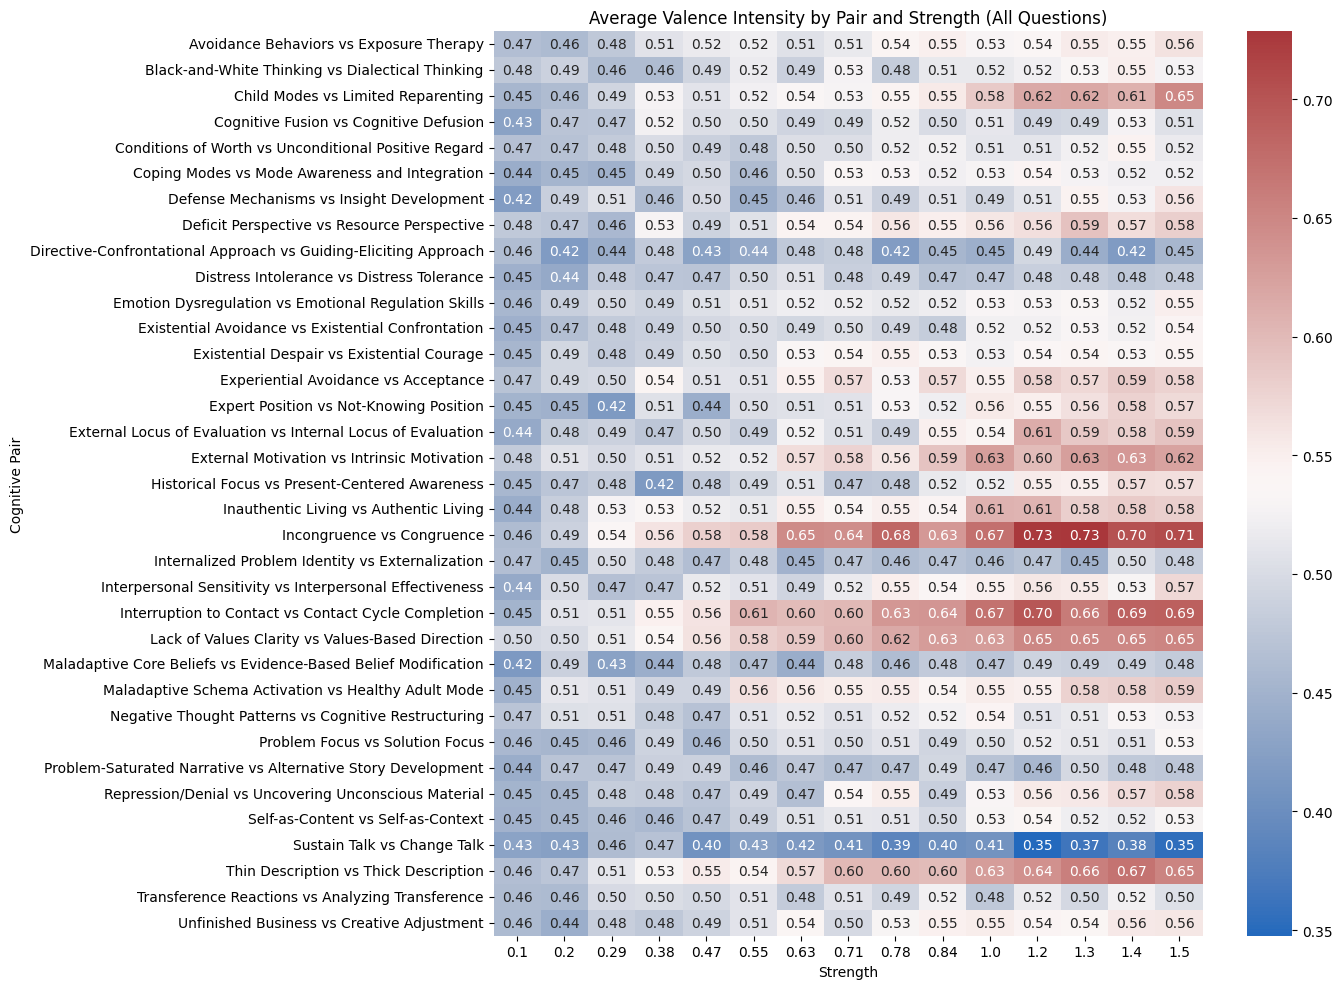

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame
df = pd.read_excel("/Users/ivanculo/Desktop/Projects/Faks/LLM_agumented_therapy/Cogexp/Valence/Data/Experiments_therapeutic_with_categories001.xlsx")

# Pivot: Average valence across all questions per pair and strength
pivot = df.pivot_table(
    index='pair',
    columns='strength',
    values='valence_intensity',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="vlag")
plt.title("Average Valence Intensity by Pair and Strength (All Questions)")
plt.xlabel("Strength")
plt.ylabel("Cognitive Pair")
plt.tight_layout()
plt.show()

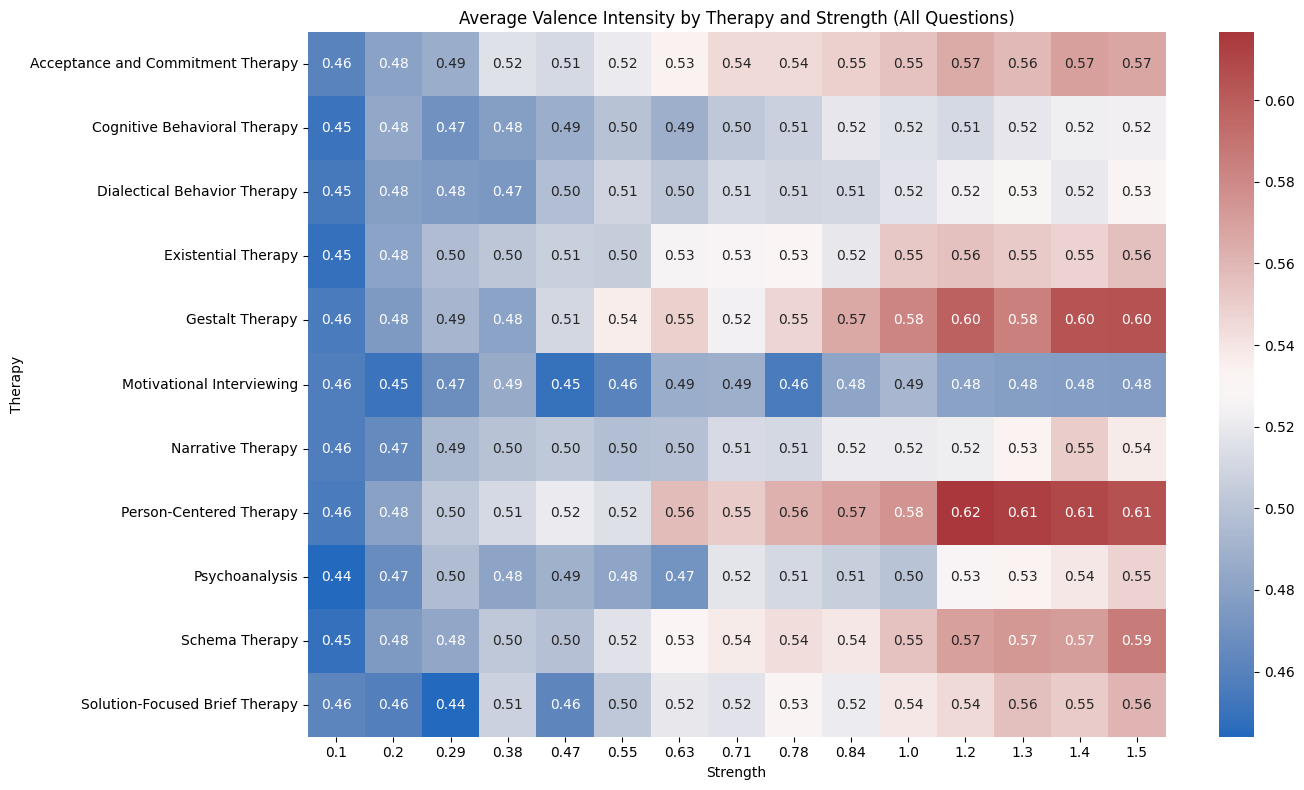

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame
df = pd.read_excel("/Users/ivanculo/Desktop/Projects/Faks/LLM_agumented_therapy/Cogexp/Valence/Data/Experiments_therapeutic_with_categories001.xlsx")

# If 'therapy' column does not exist, extract it from 'pair' (assuming format: "... vs ... (TherapyName)")
if 'therapy' not in df.columns:
    # Example extraction: assumes therapy is after the last 'vs' or in parentheses, adjust as needed
    # Here, let's assume you have a mapping or can extract from pair names
    # For demonstration, extract text after last 'vs' and strip
    df['therapy'] = df['pair'].str.extract(r'vs (.*)')[0].str.strip()

# Pivot: Average valence across all questions per therapy and strength
pivot_therapy = df.pivot_table(
    index='therapy',
    columns='strength',
    values='valence_intensity',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_therapy, annot=True, fmt=".2f", cmap="vlag")
plt.title("Average Valence Intensity by Therapy and Strength (All Questions)")
plt.xlabel("Strength")
plt.ylabel("Therapy")
plt.tight_layout()
plt.show()

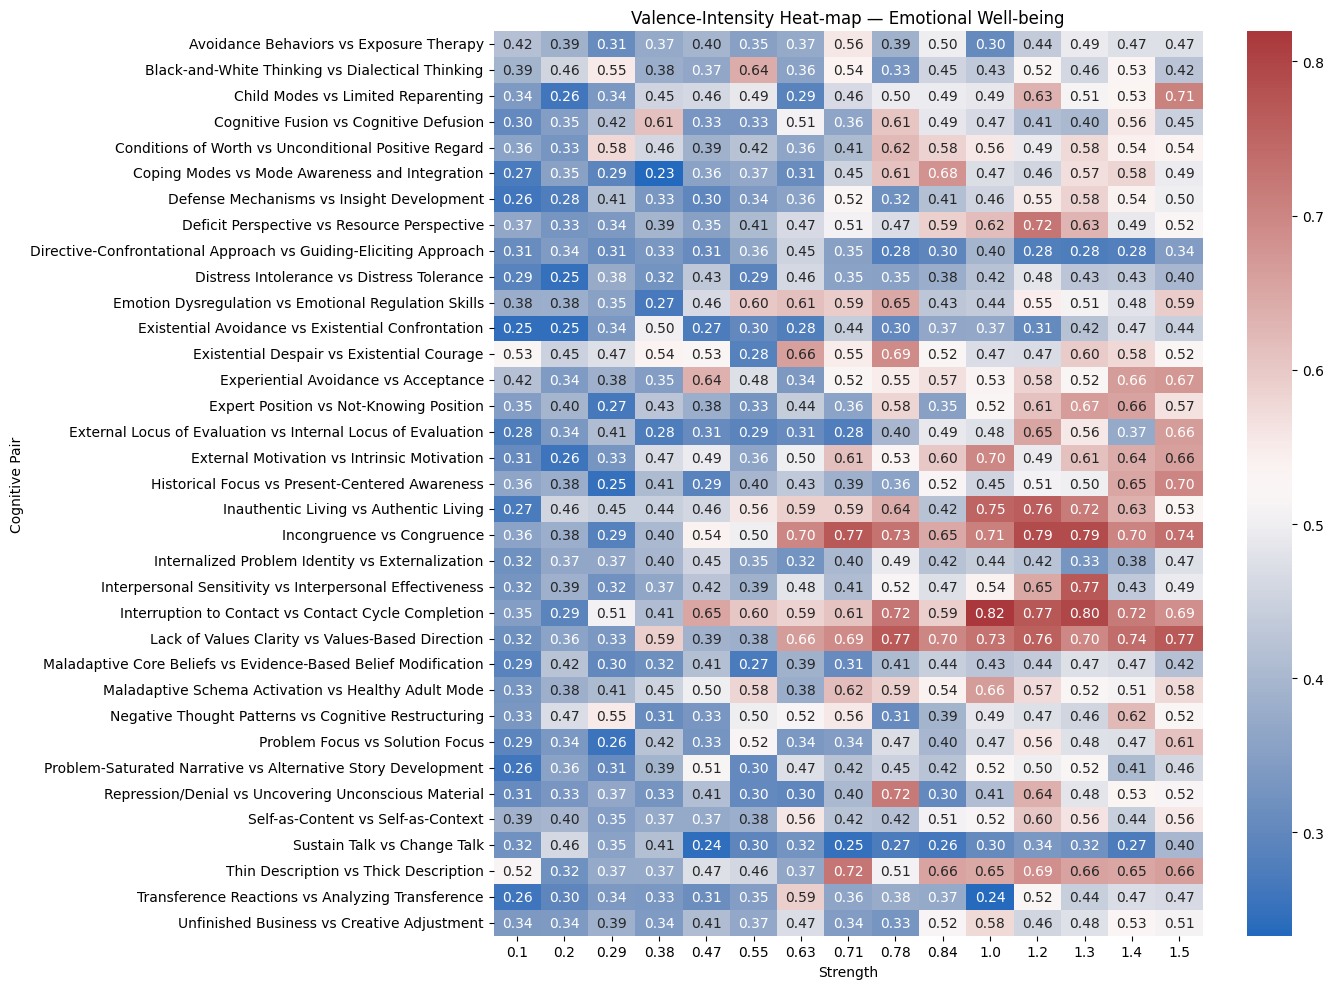

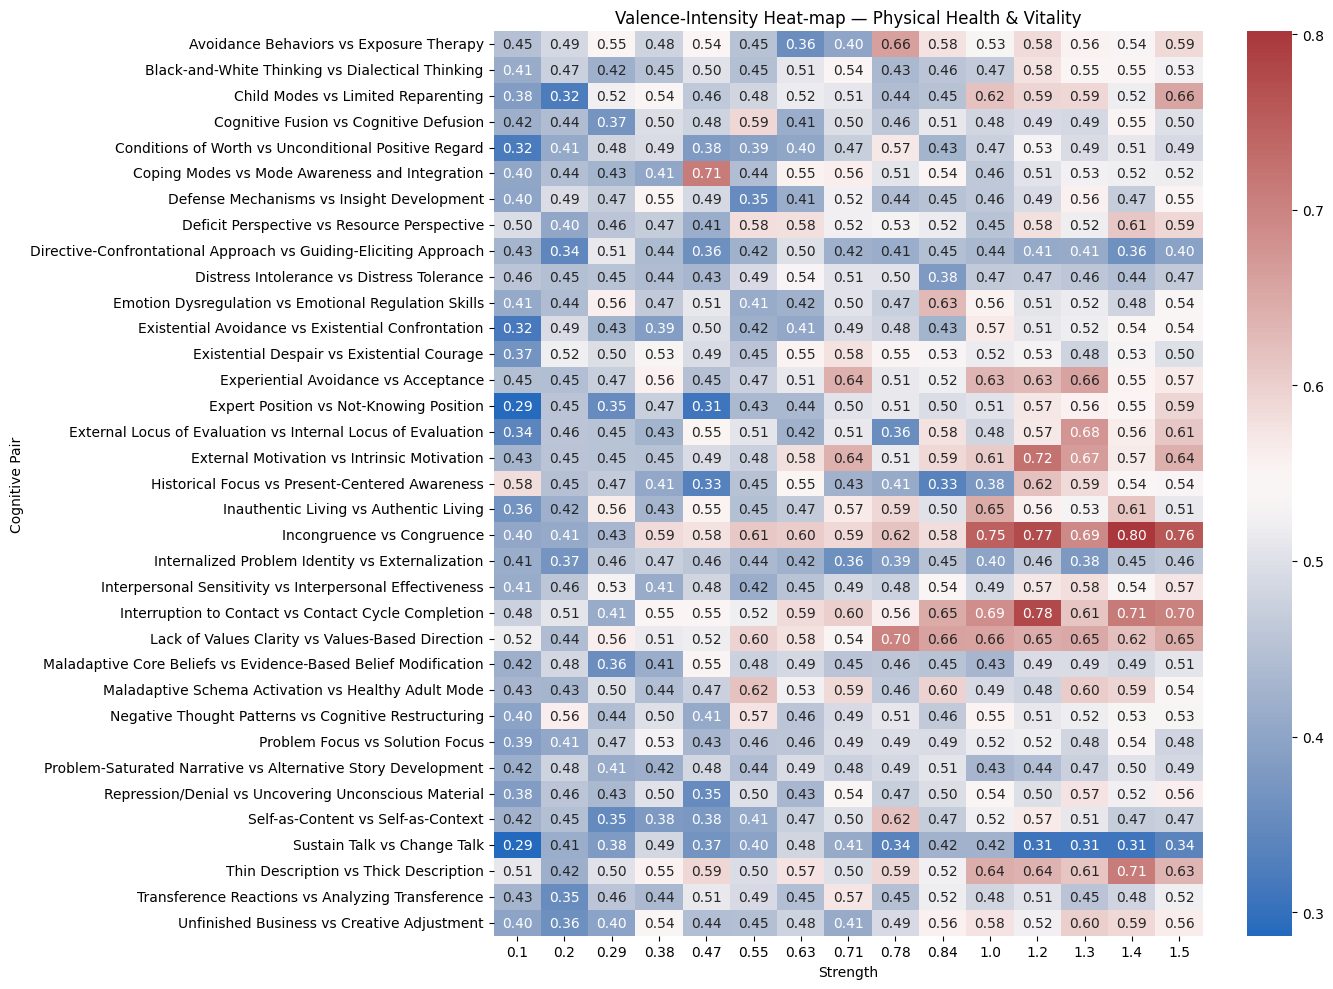

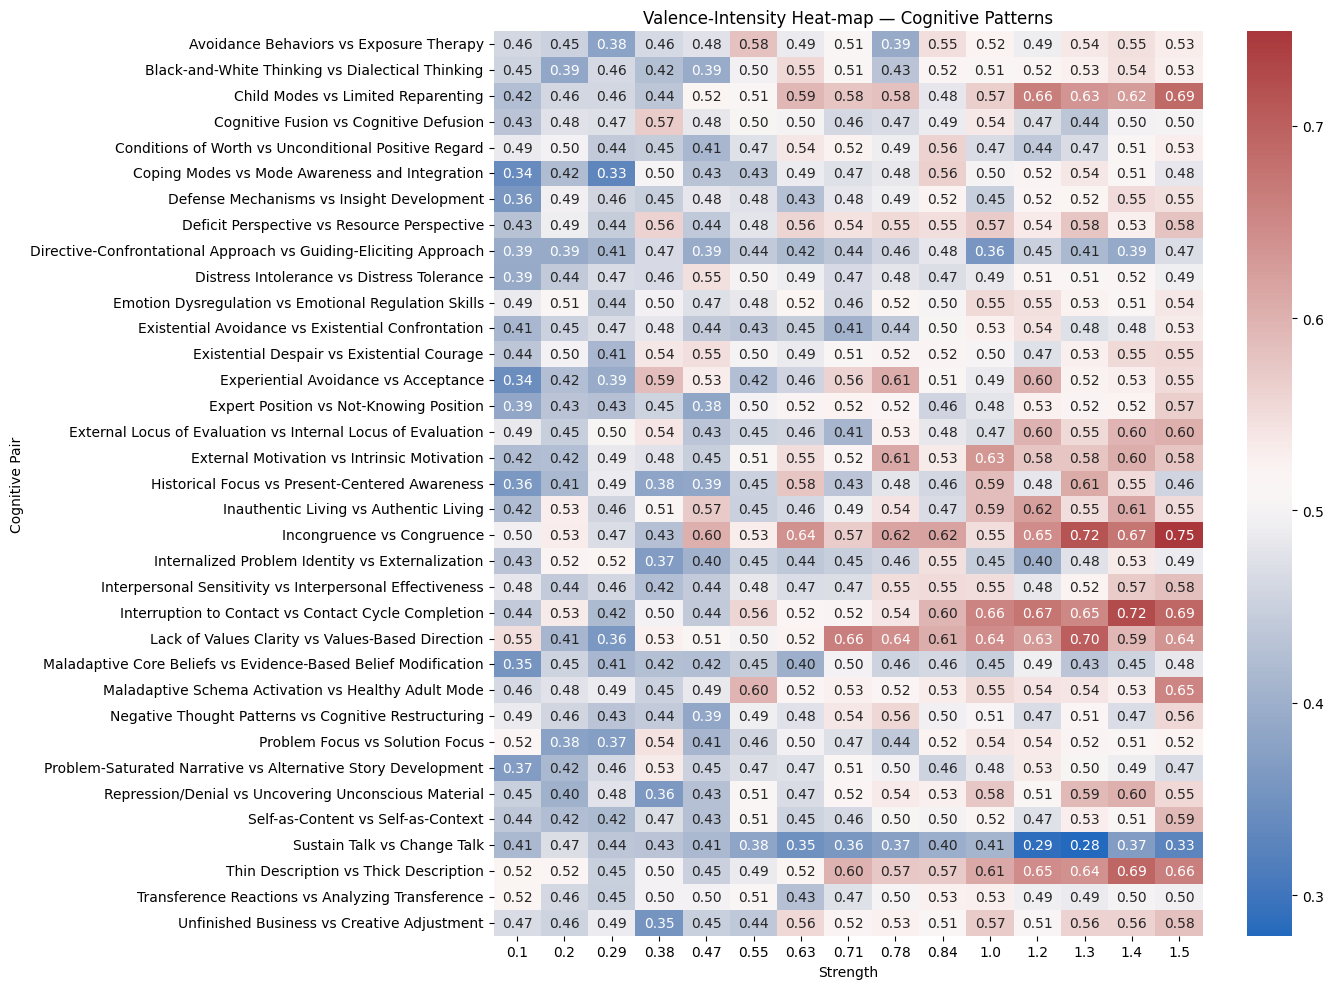

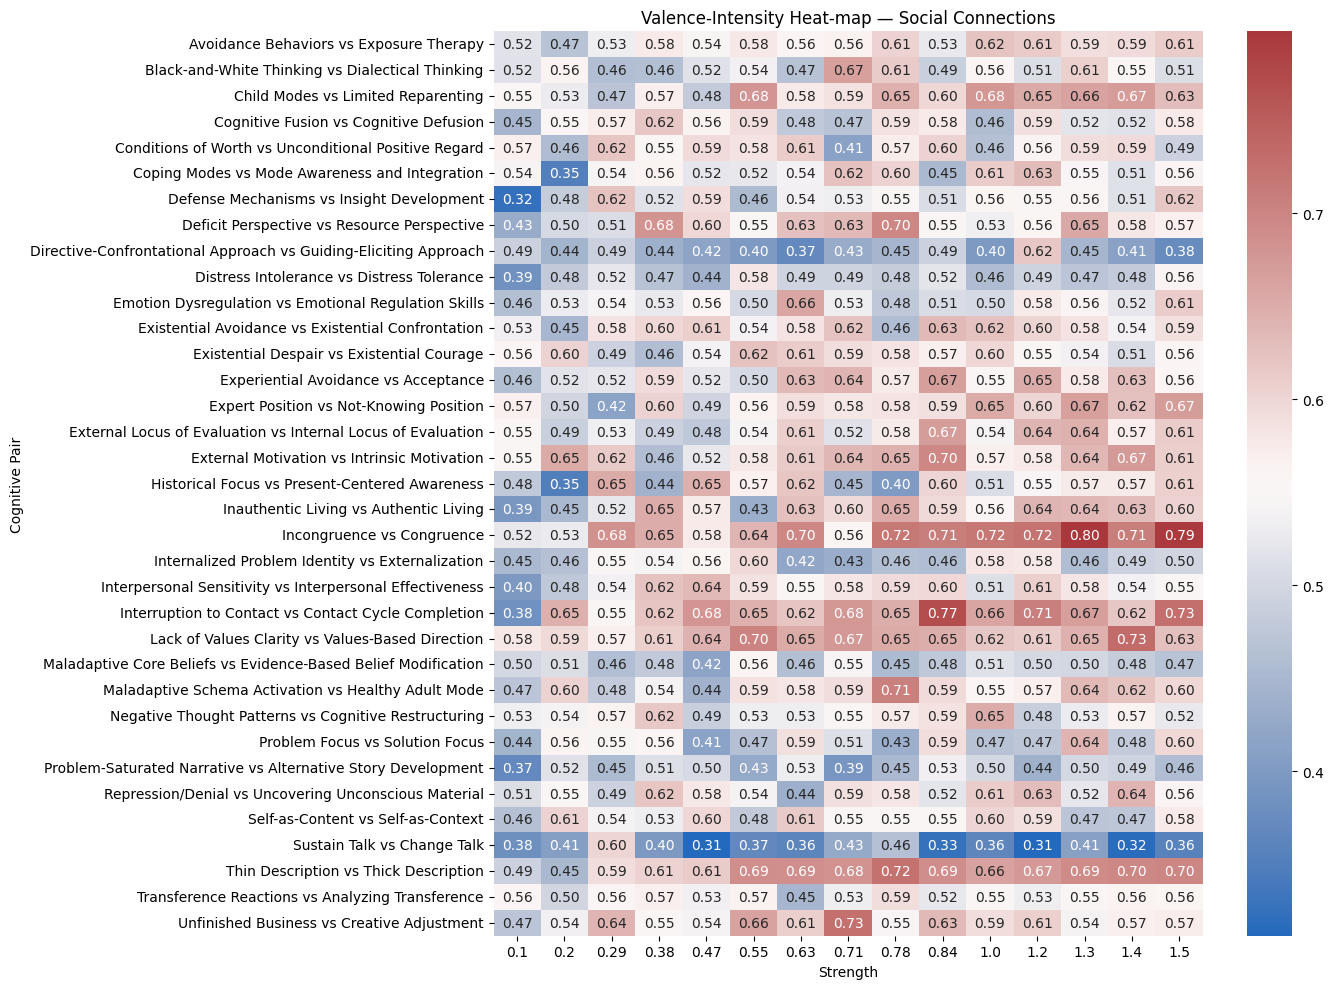

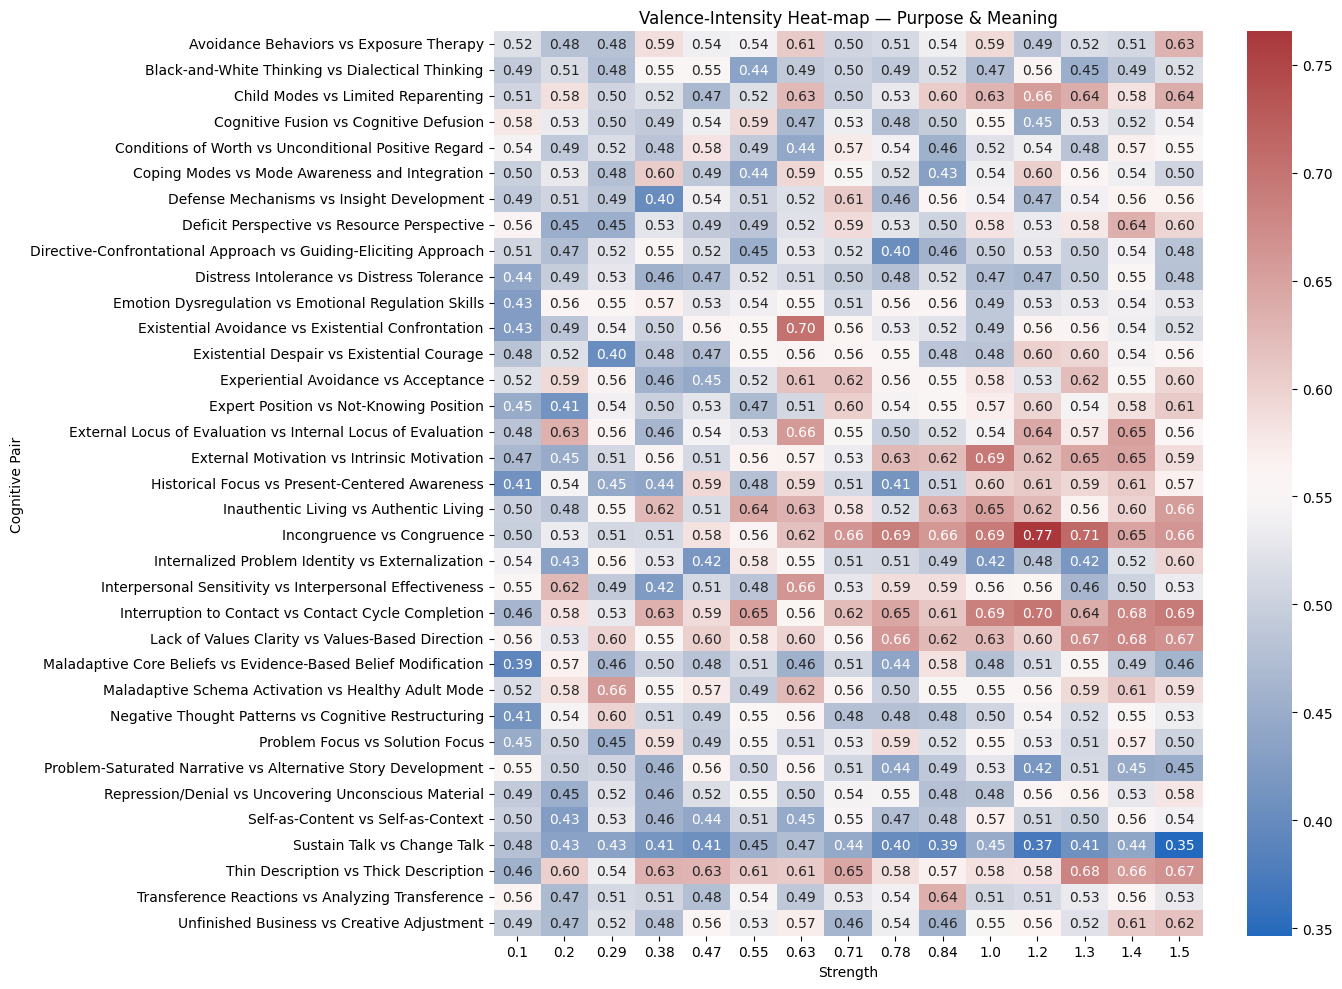

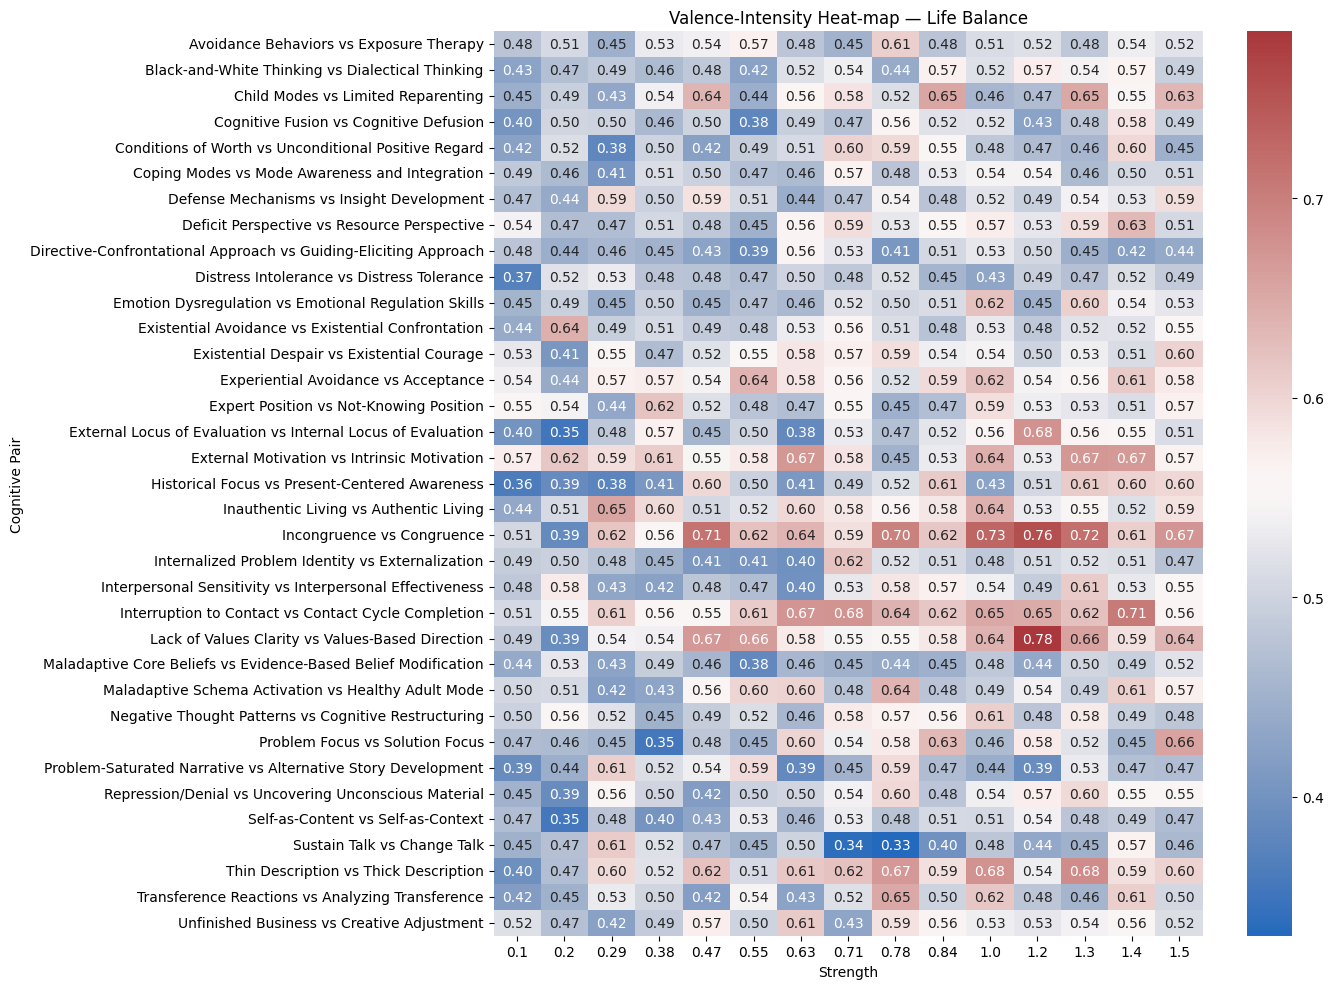

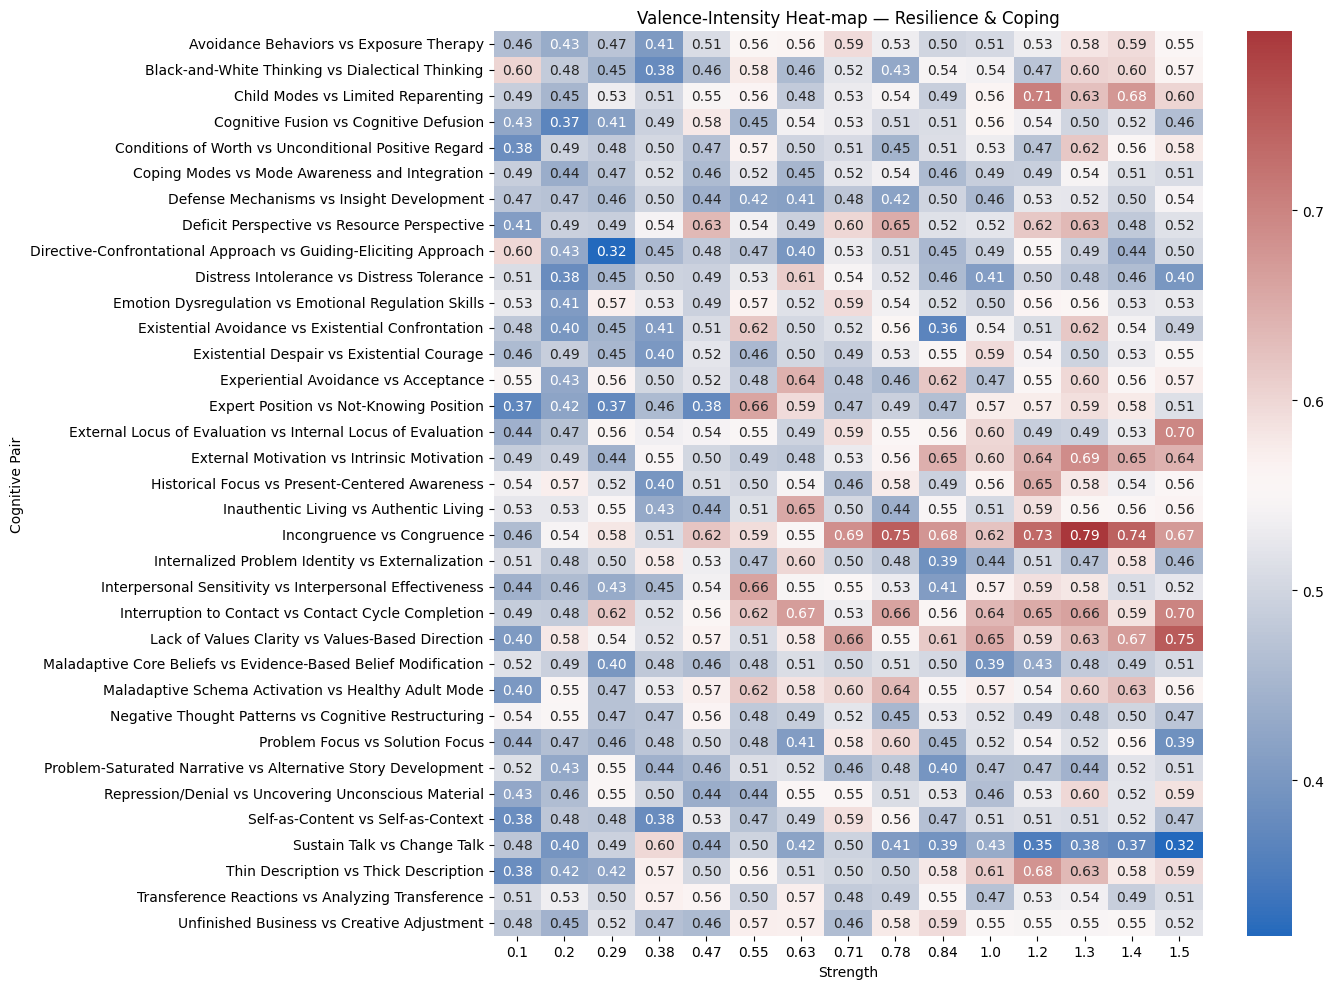

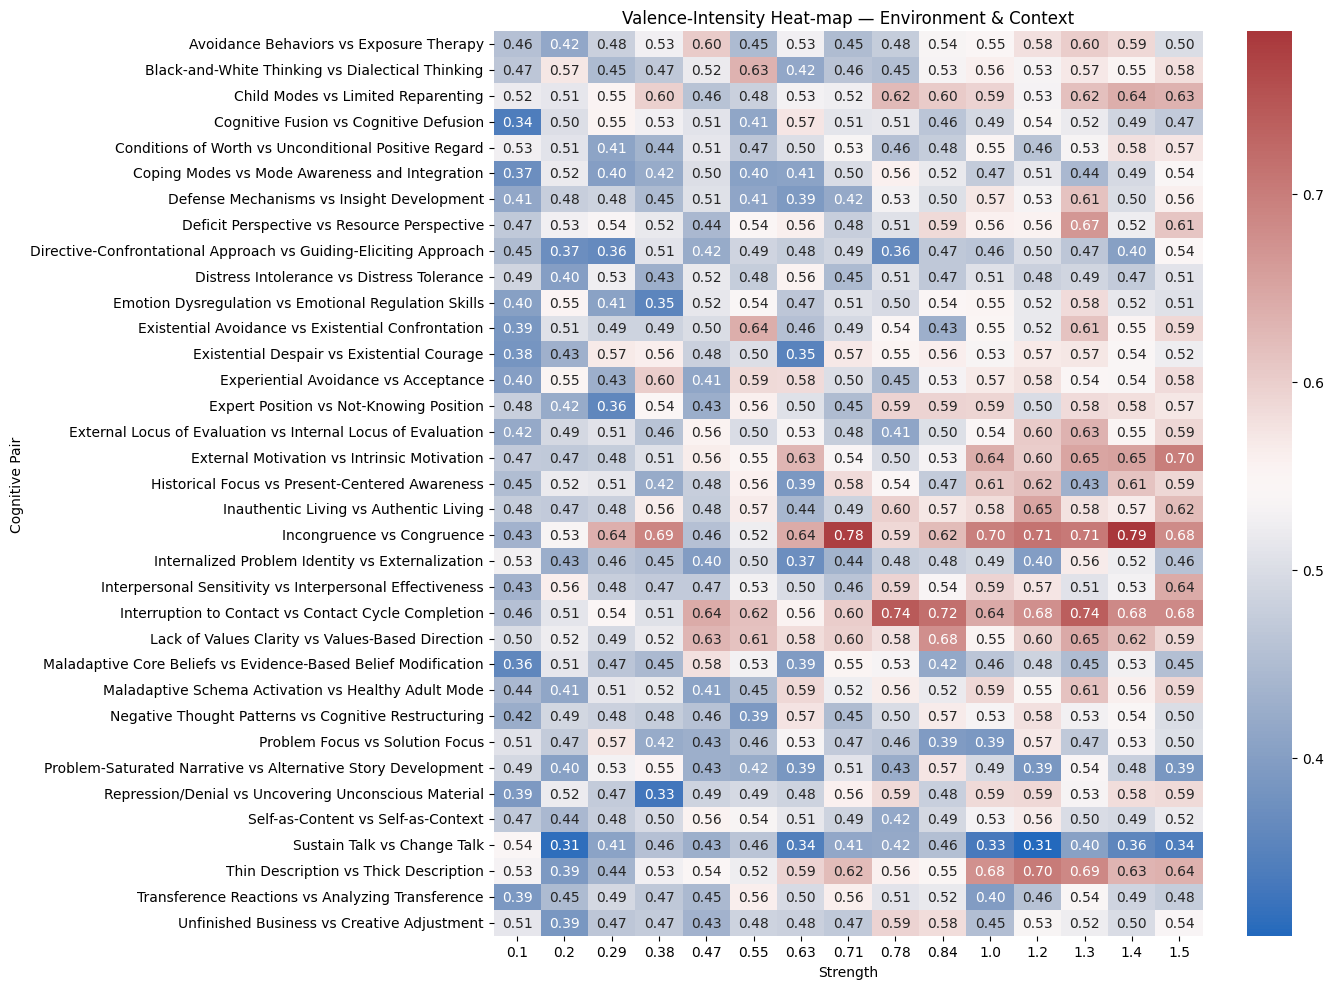

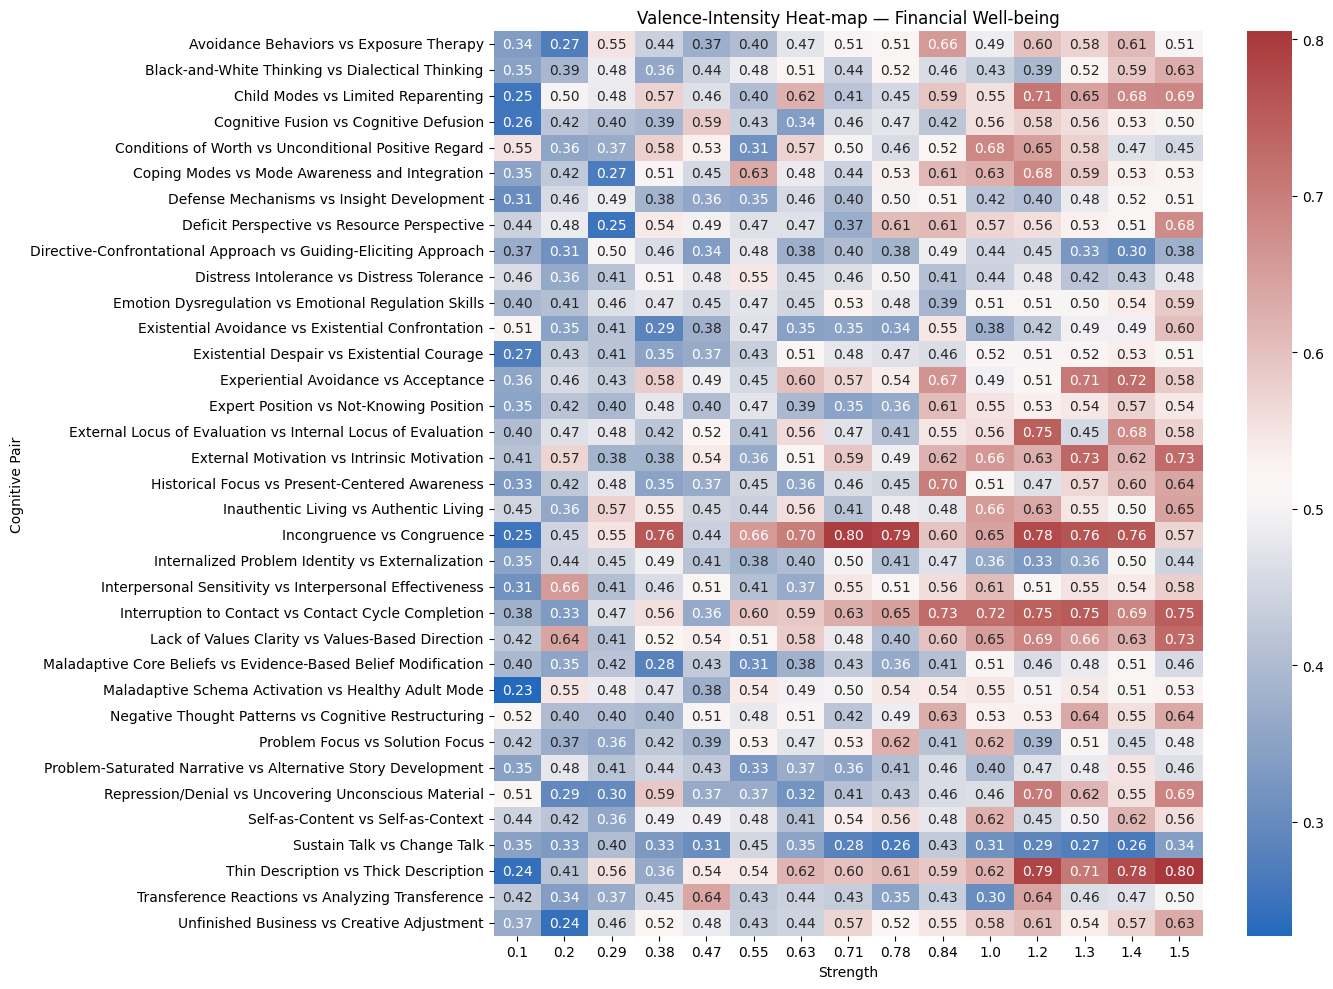

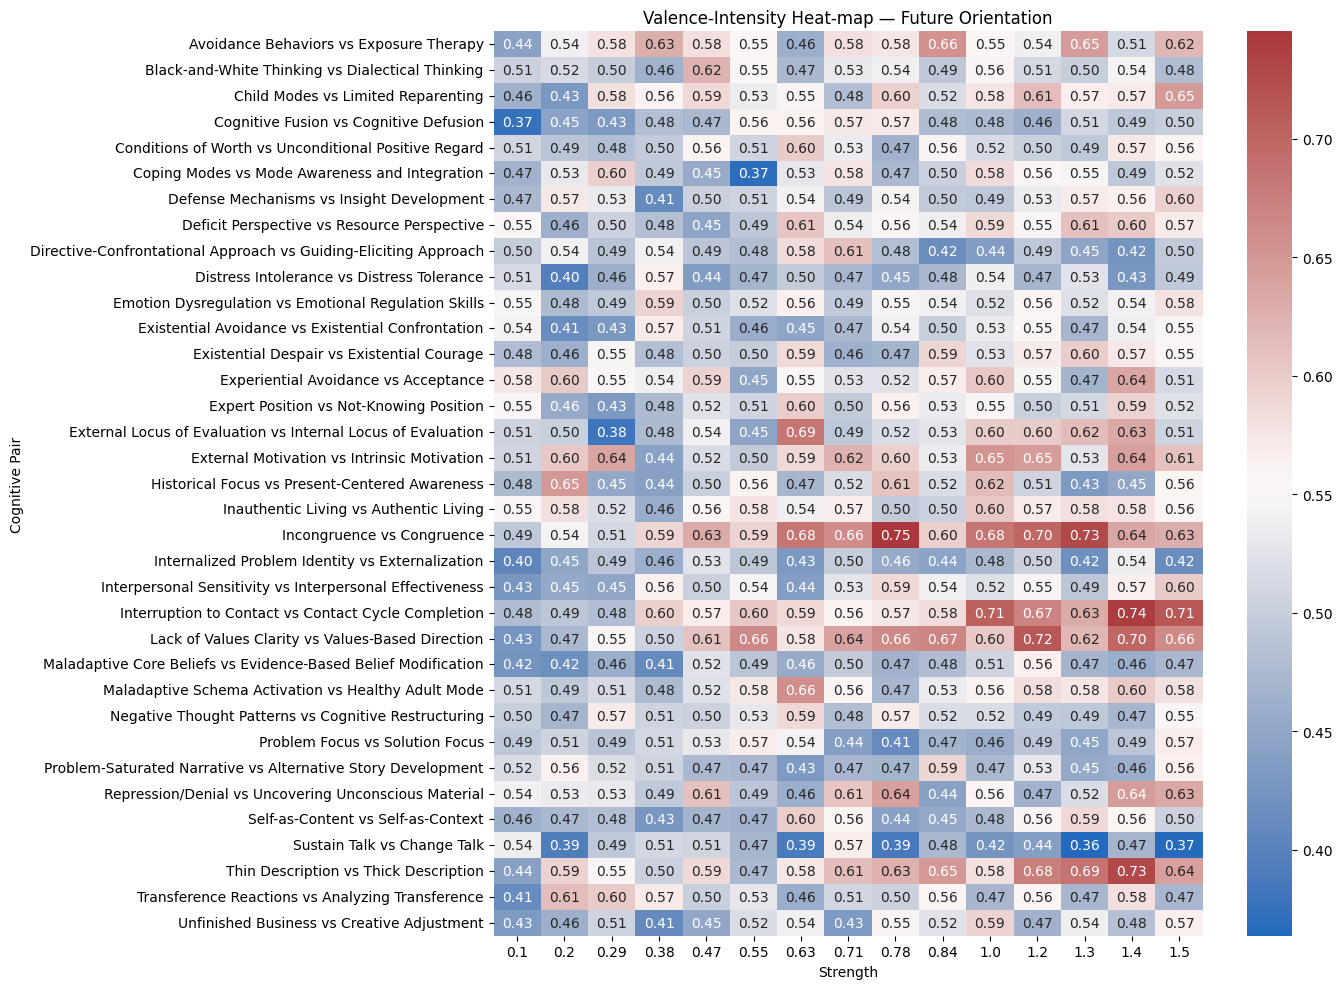

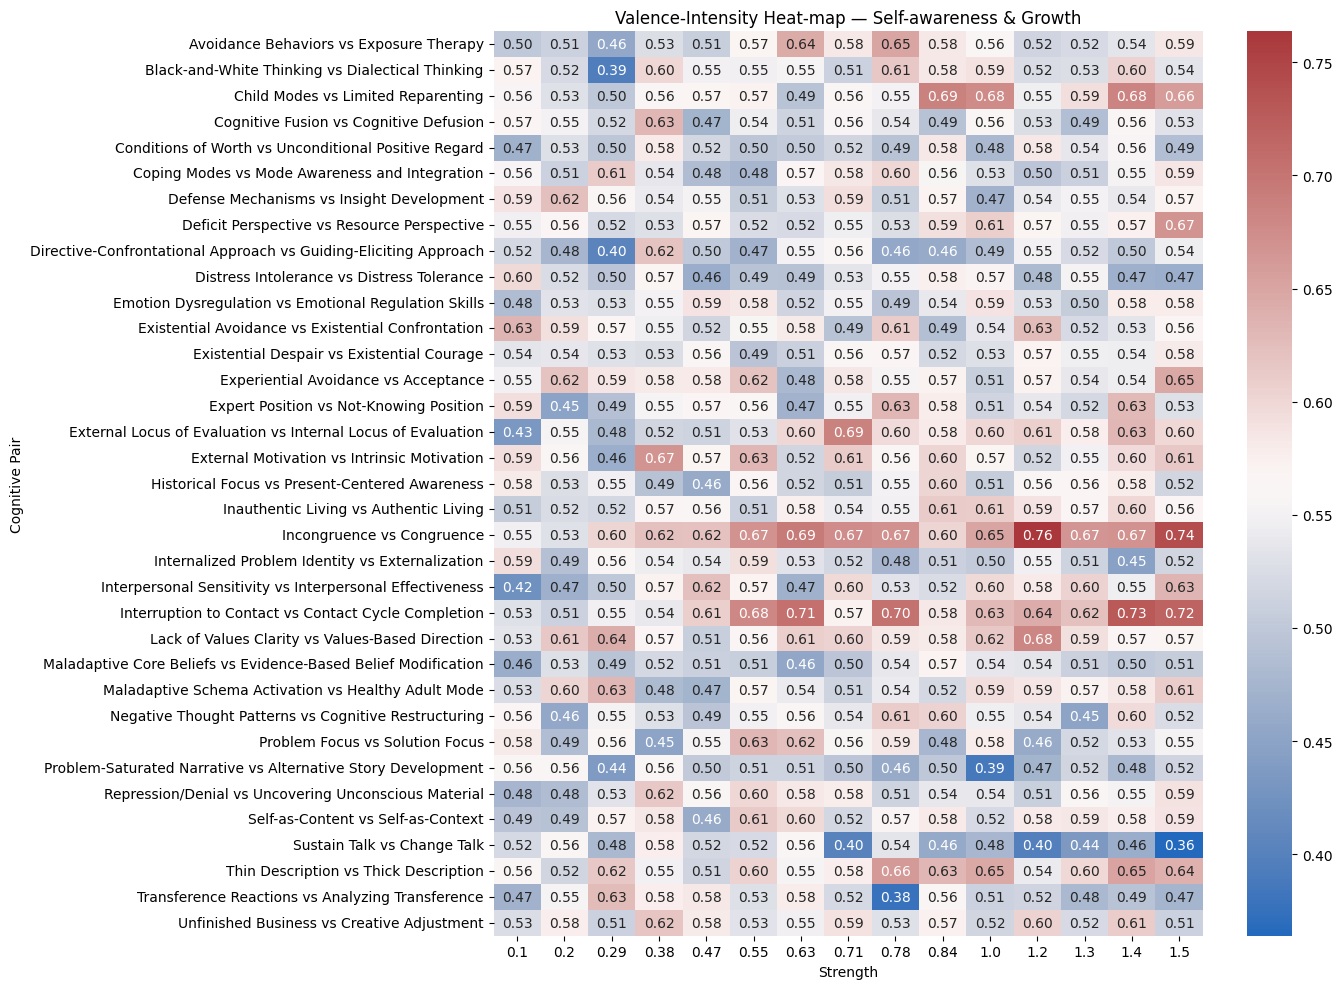

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------  Load data  ---------------------
df = pd.read_excel(
    "/Users/ivanculo/Desktop/Projects/Faks/LLM_agumented_therapy/Cogexp/Valence/Data/Experiments_therapeutic_with_categories001.xlsx"
)

# -----------------  Map questions to groups ------------
# If your question_index starts at 1 instead of 0, add 1 to each index below.
QUESTION_GROUPS = {
    "Emotional Well-being":           [0, 1, 2],
    "Physical Health & Vitality":     [3, 4, 5, 6],
    "Cognitive Patterns":             [7, 8, 9, 10],
    "Social Connections":             [11, 12, 13, 14],
    "Purpose & Meaning":              [15, 16, 17, 18],
    "Life Balance":                   [19, 20, 21],
    "Resilience & Coping":            [22, 23, 24],
    "Environment & Context":          [25, 26, 27],
    "Financial Well-being":           [28, 29],
    "Future Orientation":             [30, 31, 32],
    "Self-awareness & Growth":        [33, 34, 35],
}

# Reverse-lookup dict for fast mapping
index_to_group = {
    idx: group for group, indices in QUESTION_GROUPS.items() for idx in indices
}

# Add the group label to the dataframe
df["question_group"] = df["question_index"].map(index_to_group)

# Optional: keep the original order of groups when looping
ordered_groups = list(QUESTION_GROUPS.keys())

# ----------------  Plot one heat-map per group ---------
for group in ordered_groups:
    group_df = df[df["question_group"] == group]

    # average valence_intensity across all questions in the group
    pivot = group_df.pivot_table(
        index="pair",
        columns="strength",
        values="valence_intensity",
        aggfunc="mean",
    )

    plt.figure(figsize=(14, 10))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="vlag")
    plt.title(f"Valence-Intensity Heat-map — {group}")
    plt.xlabel("Strength")
    plt.ylabel("Cognitive Pair")
    plt.tight_layout()
    plt.show()

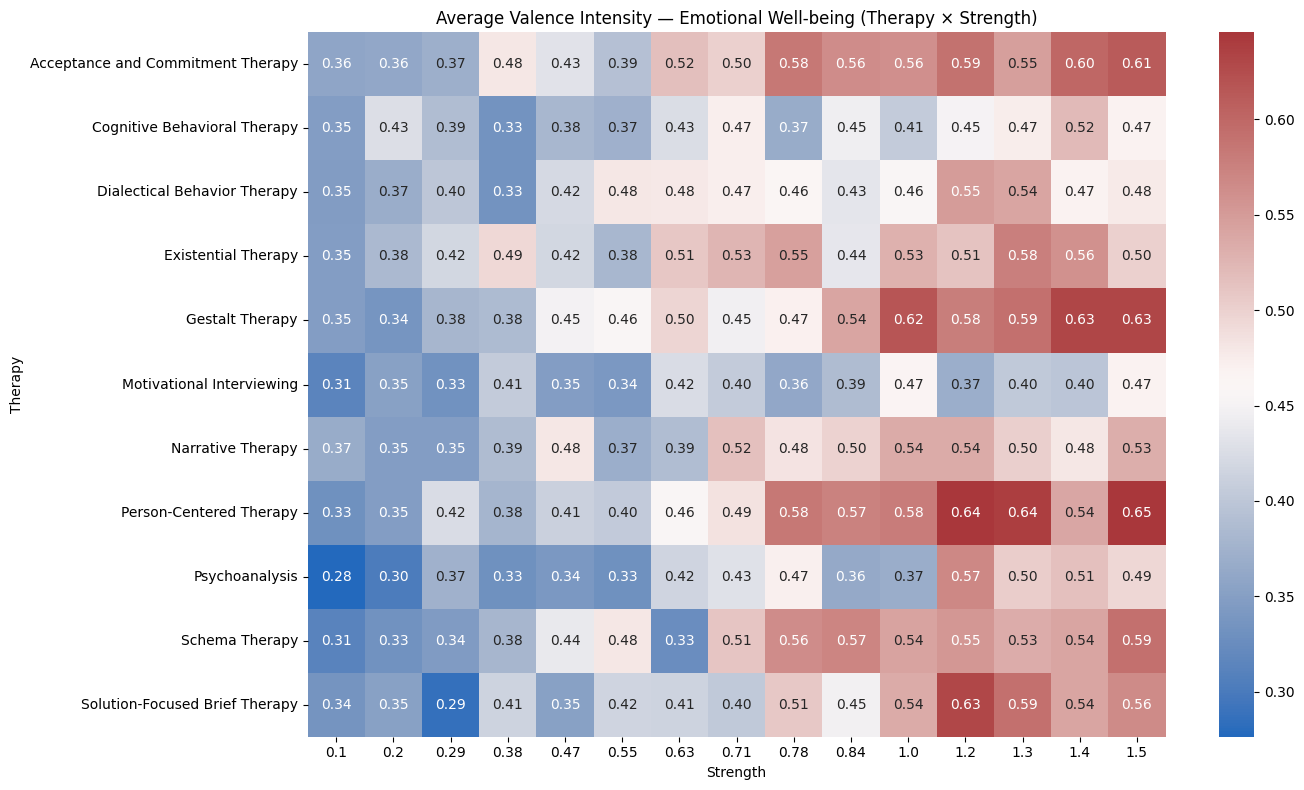

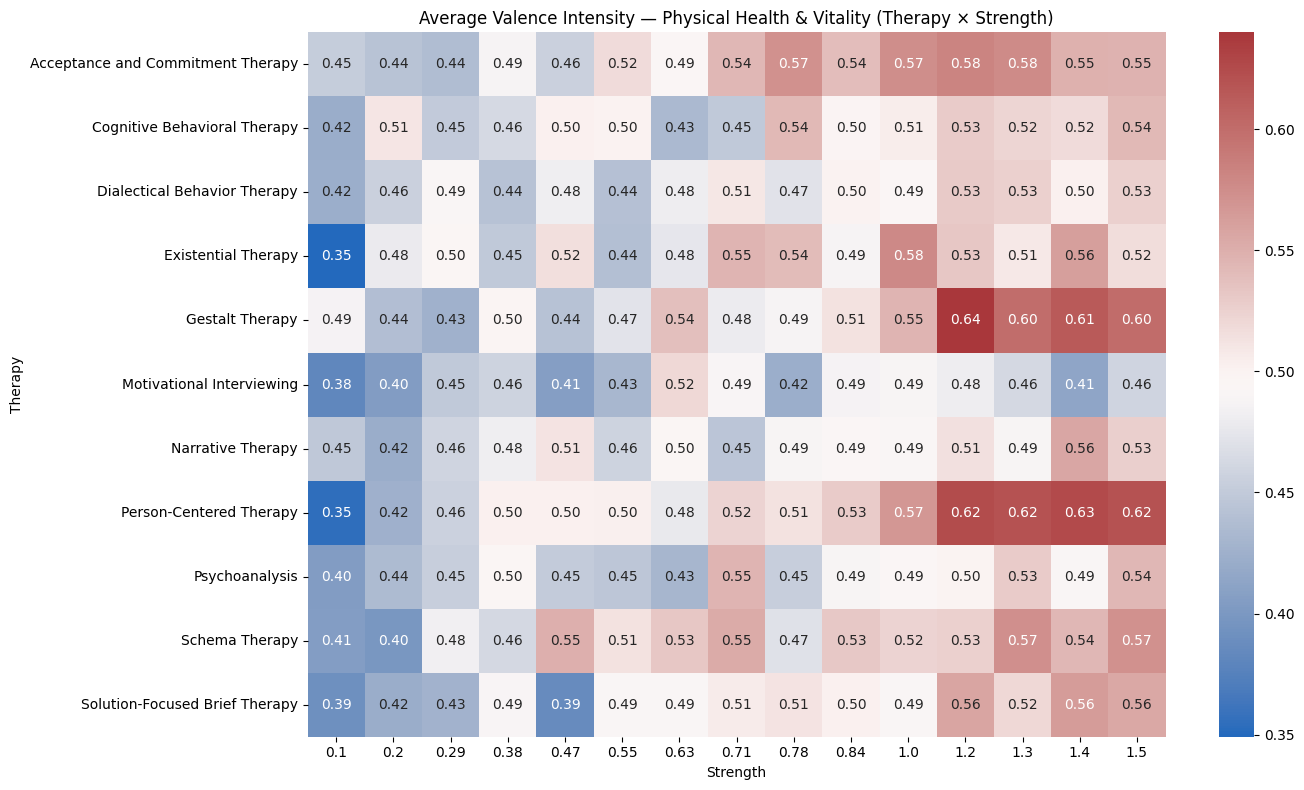

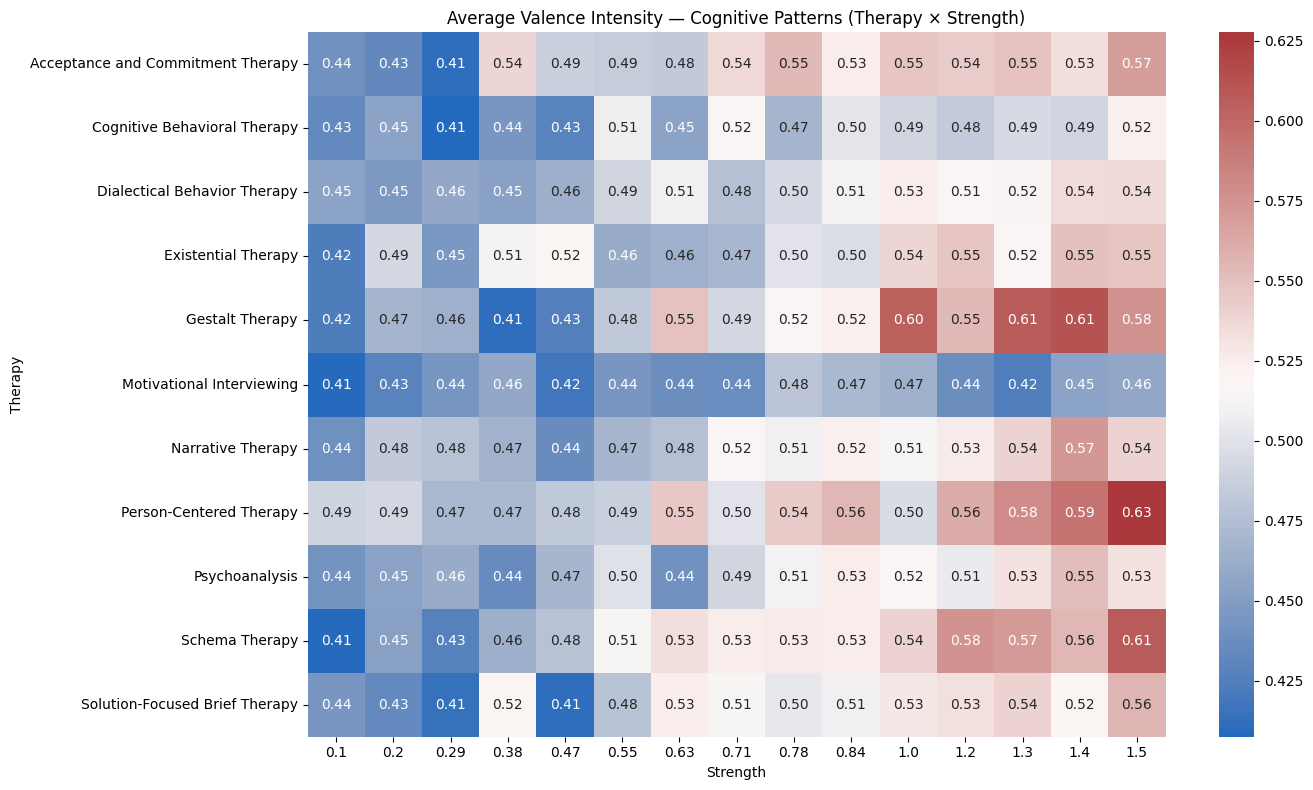

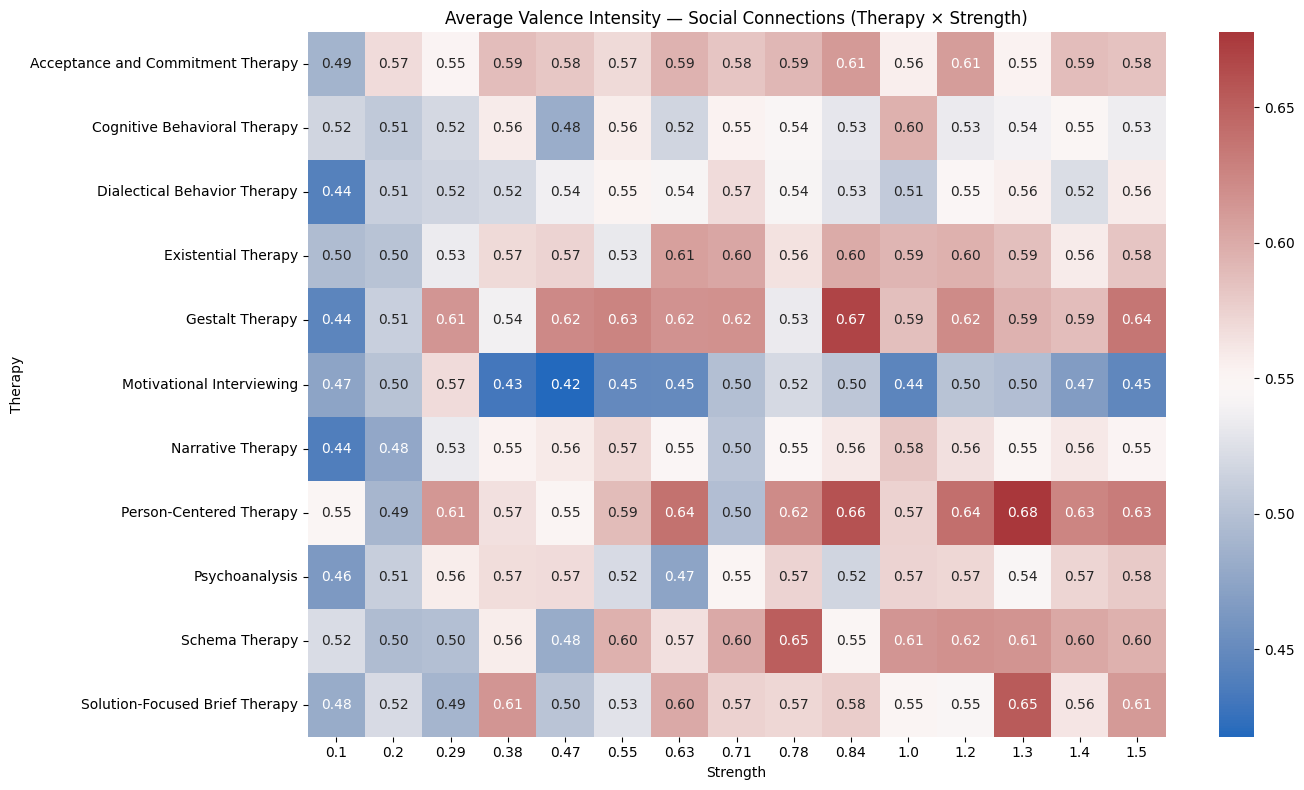

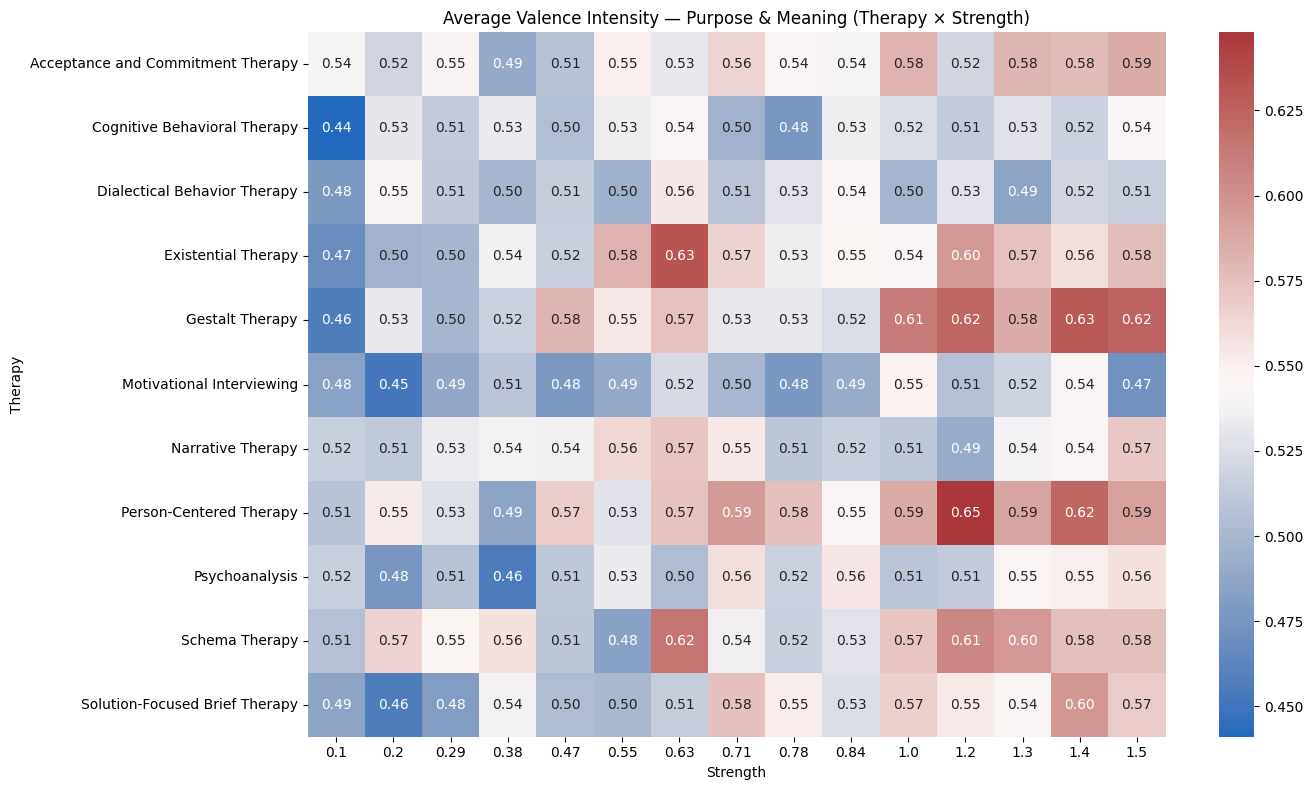

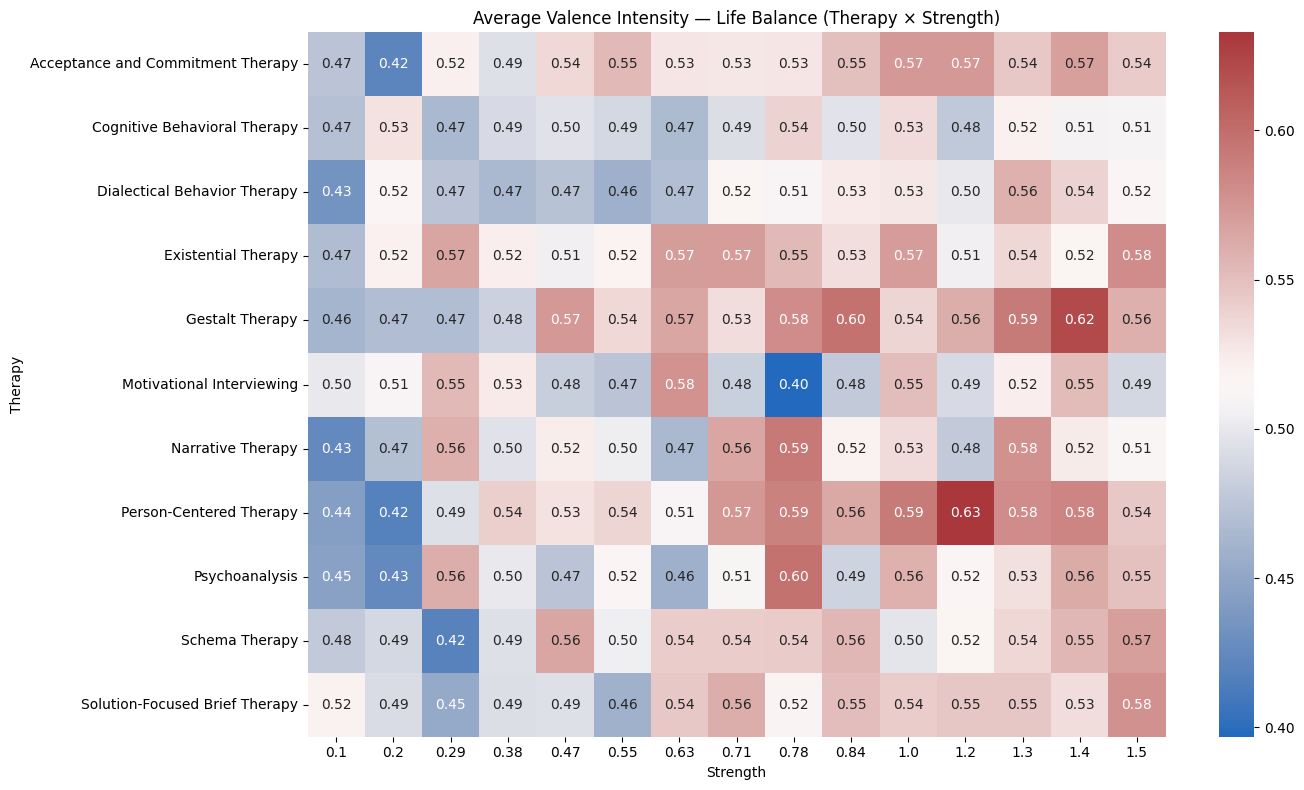

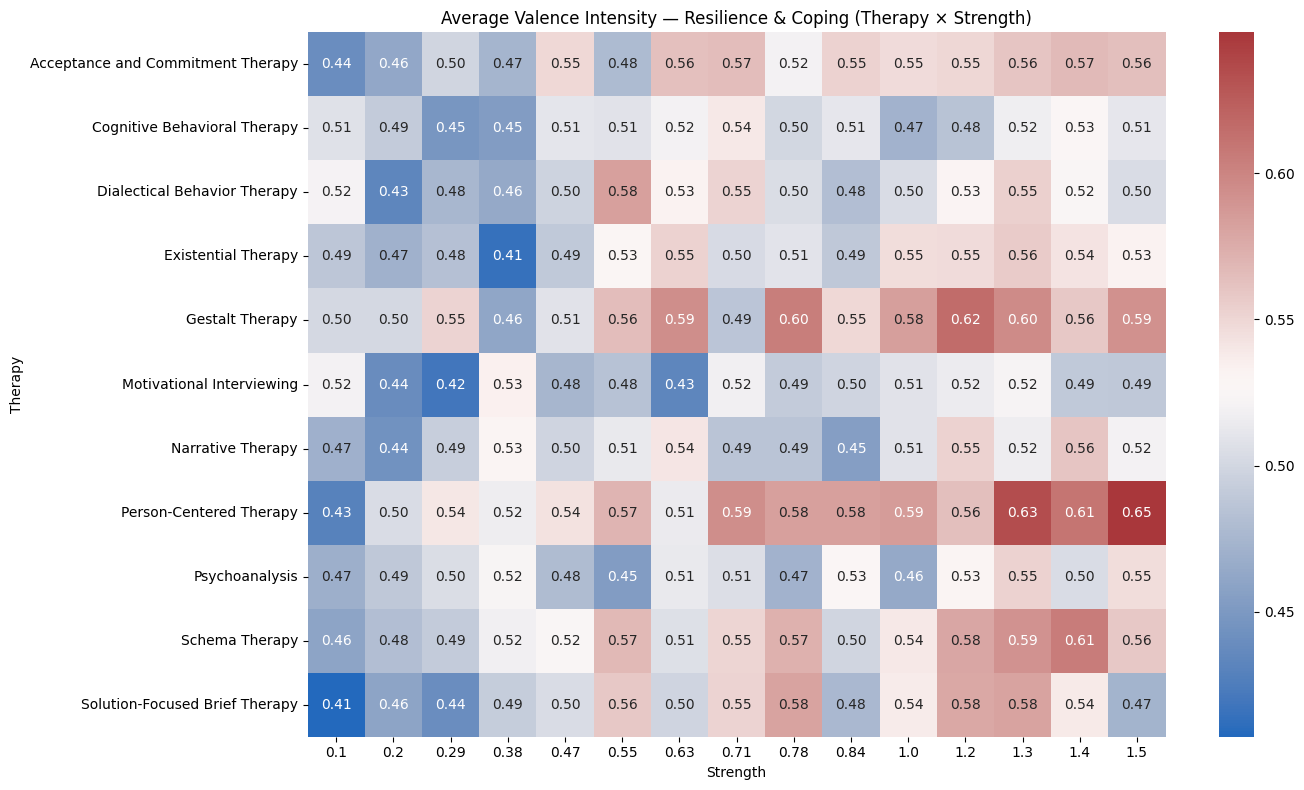

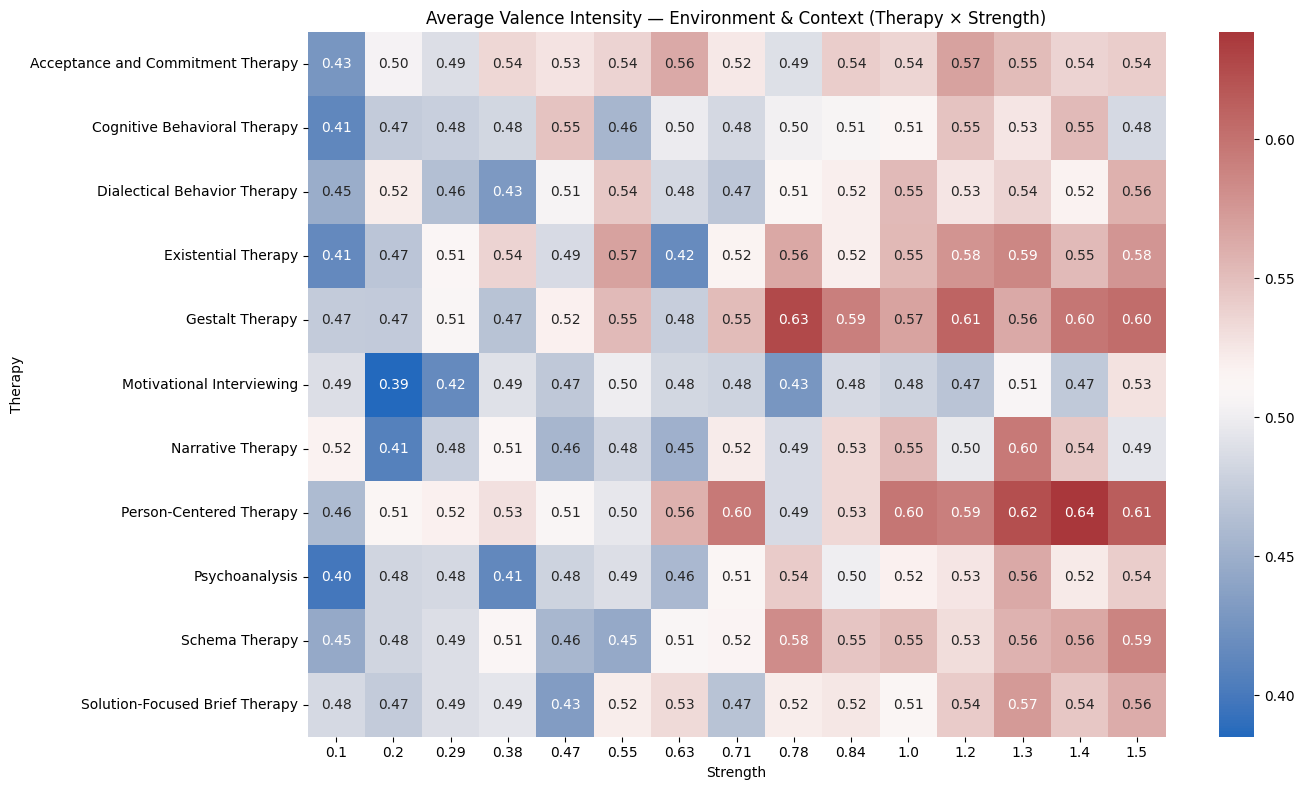

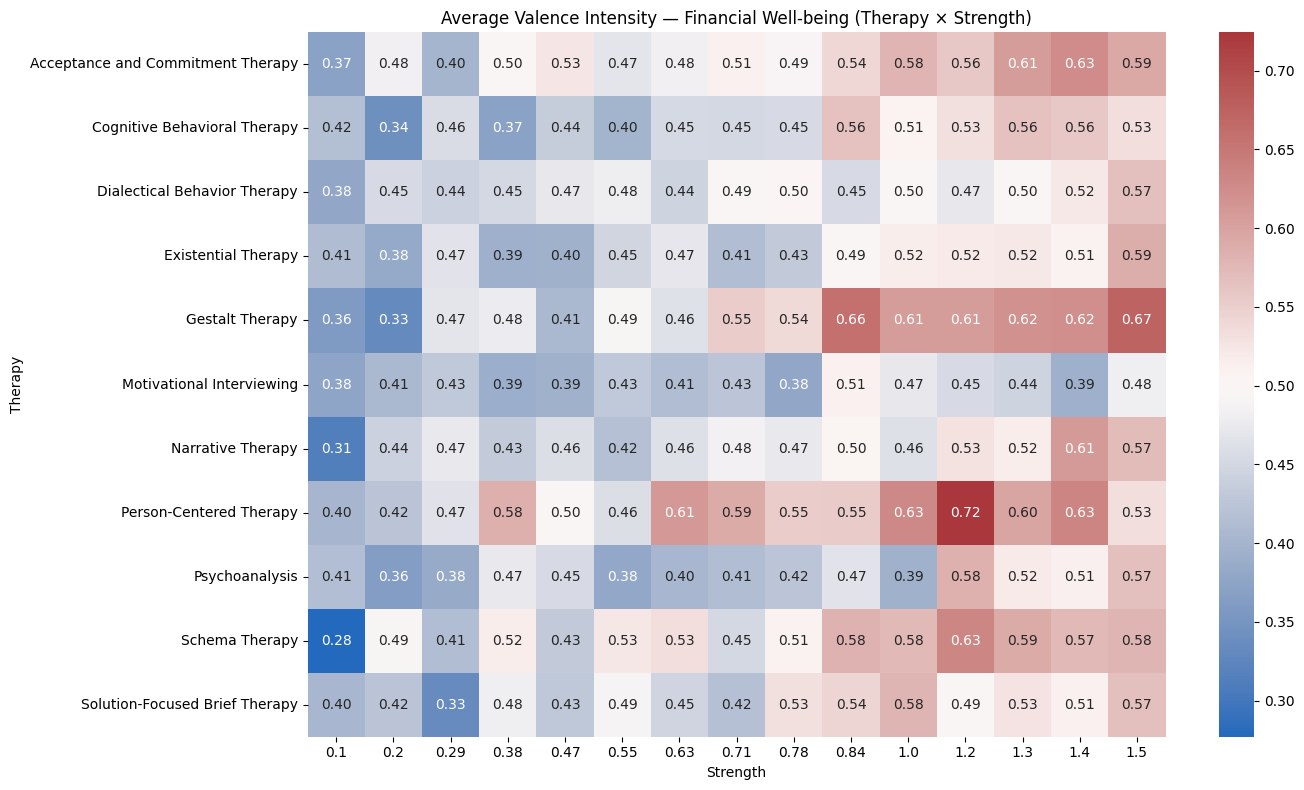

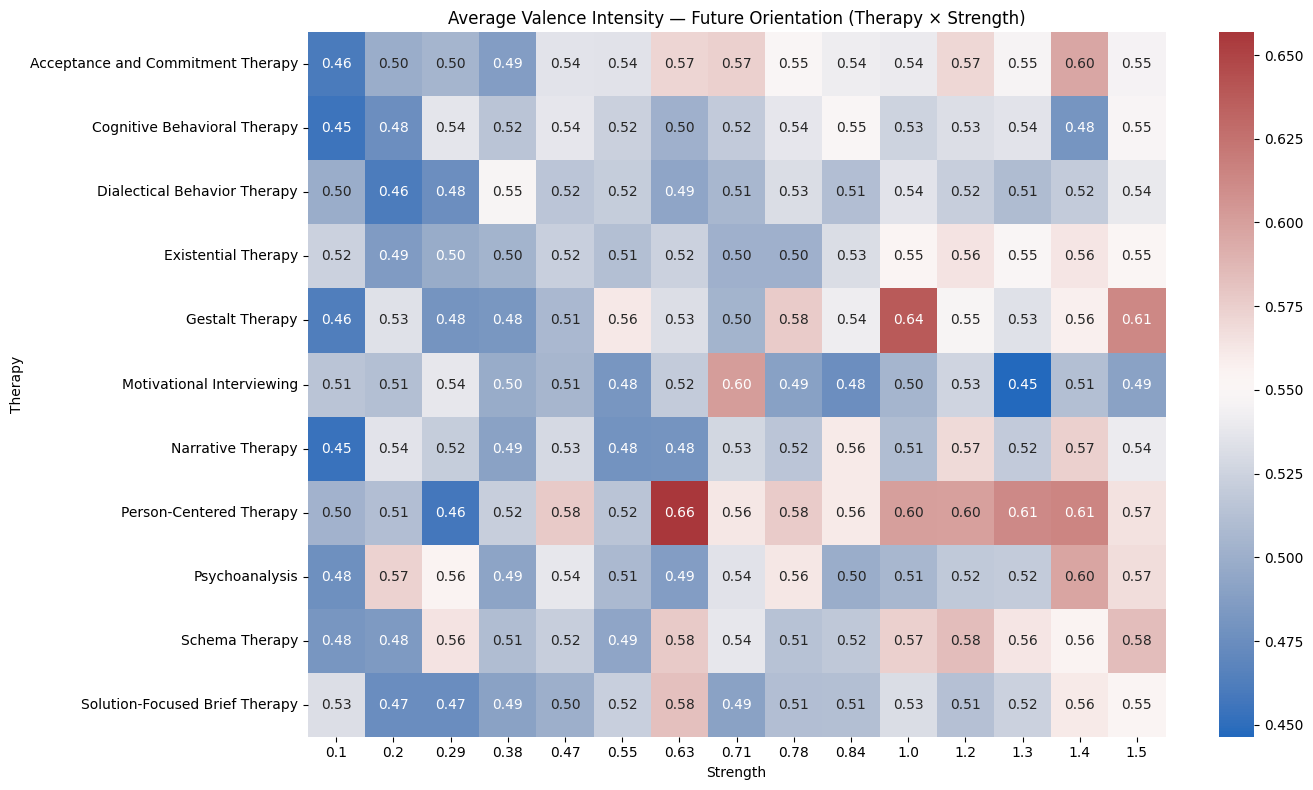

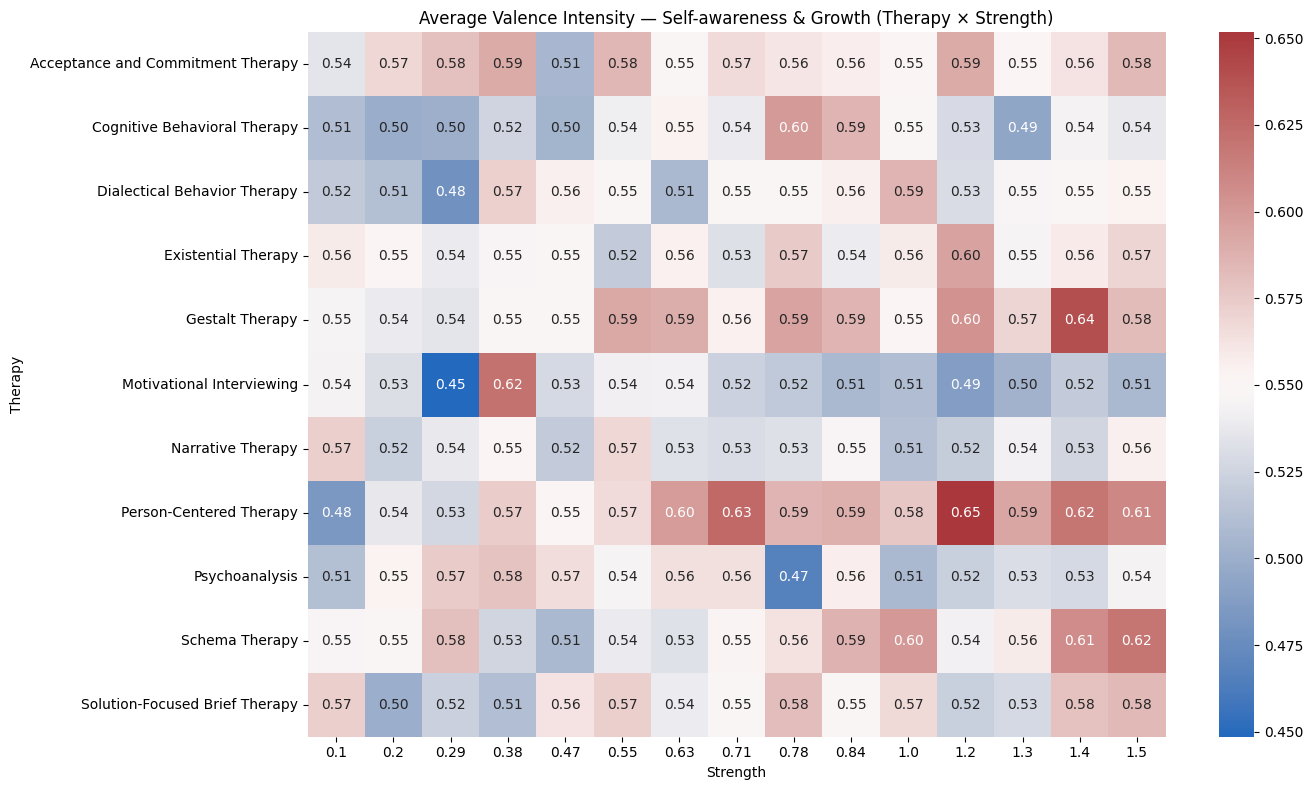

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------  Load data  ---------------------
df = pd.read_excel(
    "/Users/ivanculo/Desktop/Projects/Faks/LLM_agumented_therapy/Cogexp/Valence/Data/Experiments_therapeutic_with_categories001.xlsx"
)

# -----------------  Extract / verify therapy ----------
if "therapy" not in df.columns:
    # tweak the pattern if your naming convention is different
    df["therapy"] = (
        df["pair"]
        .str.extract(r"vs\s*(.*?)(?:\)|$)", expand=False)
        .str.strip()
        .fillna("Unknown")
    )

# -------------  Map questions to thematic blocks ------
QUESTION_GROUPS = {
    "Emotional Well-being":           [0, 1, 2],
    "Physical Health & Vitality":     [3, 4, 5, 6],
    "Cognitive Patterns":             [7, 8, 9, 10],
    "Social Connections":             [11, 12, 13, 14],
    "Purpose & Meaning":              [15, 16, 17, 18],
    "Life Balance":                   [19, 20, 21],
    "Resilience & Coping":            [22, 23, 24],
    "Environment & Context":          [25, 26, 27],
    "Financial Well-being":           [28, 29],
    "Future Orientation":             [30, 31, 32],
    "Self-awareness & Growth":        [33, 34, 35],
}

index_to_group = {
    idx: grp for grp, idxs in QUESTION_GROUPS.items() for idx in idxs
}
df["question_group"] = df["question_index"].map(index_to_group)

# ----------------  Plot per group / per therapy -------
for group in QUESTION_GROUPS.keys():          # preserves original order
    gdf = df[df["question_group"] == group]

    pivot = gdf.pivot_table(
        index="therapy",
        columns="strength",
        values="valence_intensity",
        aggfunc="mean",
    )

    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="vlag")
    plt.title(f"Average Valence Intensity — {group} (Therapy × Strength)")
    plt.xlabel("Strength")
    plt.ylabel("Therapy")
    plt.tight_layout()
    plt.show()